<a href="https://colab.research.google.com/github/andreamurari/percolation_project/blob/main/percolation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from sklearn.cluster import DBSCAN

#FUNZIONI

In [74]:
#FUNZIONE CHE GENERA COORDINATE CON UNA POIS LAMBA * T^2

def generate_poisson_coordinates(T, k):
  # Step 1: Generate N from Poisson distribution
  N = np.random.poisson(k * T**2)
  # Step 2: Check if N is zero and handle termination
  if N == 0:
    return []
  # Step 3: Generate random numbers and scale to coordinates
  else:
    coordinates_x = []
    coordinates_y = []
    for _ in range(N):
      U = np.random.random()
      V = np.random.random()
      coordinates_x.append(U * T)
      coordinates_y.append(V * T)
  print (f"N = {N} \nCoordinates X = {coordinates_x} \nCoordinates Y = {coordinates_y}")
  return coordinates_x, coordinates_y

In [135]:
#FUNZIONE CHE CREA CLUSTERS
def clusterizza_dbscan(coordinates_x, coordinates_y, eps=1, min_samples=2):
# Combine x and y coordinates into a single NumPy array
  coordinates = np.array(list(zip(coordinates_x, coordinates_y)))

  # Create a DBSCAN instance with specified parameters
  db = DBSCAN(eps=eps, min_samples=min_samples)

  # Fit the model to the data points
  db.fit(coordinates)

  # Extract cluster labels for each point
  cluster_labels = db.labels_

  # Create a list to store clusters (indices of points in each cluster)
  clusters = []
  for i, label in enumerate(cluster_labels):
    # Skip noise points (labeled -1)
    if label == -1:
      continue
    # Find all points with the same label (belonging to the same cluster)
    cluster_indices = [j for j, l in enumerate(cluster_labels) if l == label]
    clusters.append(cluster_indices)

  return clusters

In [142]:
def remove_duplicates(clusters_with_doubles):
  for i in range(len(clusters_with_doubles)):
    for j in range(i+1, len(clusters_with_doubles)):
      if clusters_with_doubles[i] == clusters_with_doubles[j]:
        clusters_with_doubles[j] = "duplicato"
  clusters = []
  for element in clusters_with_doubles:
    if element != "duplicato":
      clusters.append(element)
  return clusters

In [143]:
#FUNZIONE PER SIZE DEL CLUSTER PIU GRANDE
def largest_cluster_size (clusters):
  max_cluster_size = 0
  for cluster in clusters:
    if len(cluster) > max_cluster_size:
      max_cluster_size = len(cluster)
  return max_cluster_size

In [144]:
#FUNZIONE CHE RESTITUISCE IL NUMERO DI CLUSTERS
def number_of_clusters(clusters):
  return len(clusters)

#SVOLGIMENTO

In [145]:
T = 5 #MAX DOMINIO
l = 1 #LAMBDA
M = 10 #NUMERO ITERAZIONI

In [146]:
coordinates_x, coordinates_y = generate_poisson_coordinates(T, l)

N = 29 
Coordinates X = [4.346133095697621, 3.4079811889680918, 0.4106079649338279, 1.0398345560501459, 2.3707932755843952, 1.6001093775874187, 3.27334078359274, 2.3792736292100125, 1.5610104750570686, 3.4482562478437897, 0.6820632161359685, 2.2317851931198787, 2.6702341071031626, 3.2757741527986353, 3.2887921224320973, 1.7799960520983444, 2.886500429532375, 1.784930216048044, 3.185013740831524, 4.124535594568996, 4.291481201023258, 1.9168903247642577, 2.0057509202008657, 4.5799541780740025, 2.481482910907232, 4.038898616543208, 1.7400823380141457, 1.6915801864604978, 4.9788484083277815] 
Coordinates Y = [1.0448880294001976, 3.24398275022447, 4.0512930157179845, 0.7849990605847507, 2.9797567707508494, 2.9550693710429767, 1.1308799237431195, 0.14153333938786927, 3.8027379186989076, 0.36952168796066165, 1.4620266640658701, 3.488894900738482, 3.496348683362619, 0.3092063658047567, 3.837775225282185, 0.7990477577818145, 0.6093865398703319, 2.7714191565021116, 2.737108176831295, 3.661463090

In [147]:
clusters_with_duplicates = clusterizza_dbscan(coordinates_x, coordinates_y)
clusters = remove_duplicates(clusters_with_duplicates)
print(clusters)

[[0, 28], [1, 4, 5, 8, 11, 12, 14, 17, 18, 19, 20, 23, 24, 25, 26], [3, 6, 7, 9, 10, 13, 15, 16, 21, 22, 27]]


In [148]:
largest_cluster_size(clusters)

15

In [149]:
number_of_clusters(clusters)

3

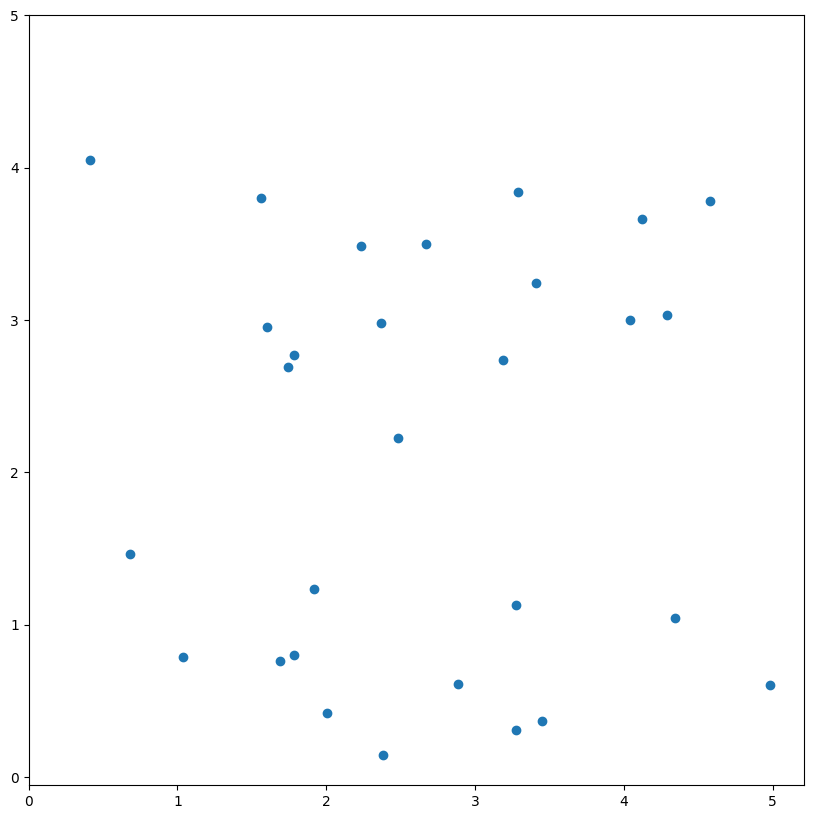

In [150]:
plt.figure(figsize = (10, 10))
plt.scatter (coordinates_x, coordinates_y)
plt.xticks(range(0, T + 1, 1))
plt.yticks(range(0, T + 1, 1))
plt.show()

In [153]:
clusters[0]

[0, 28]